In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files 
uploaded = files.upload()
import io

Saving contraceptive.csv to contraceptive.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['contraceptive.csv']))

In [ ]:
y = data.CMC
X = data.drop('CMC',axis = 1)

In [ ]:
X.head(10)

,Wife's age,Wife's education,Husband's education,Number of children,Wife's religion,Wife is working,Husband's occupation,SLI,Media exposure
0,24,2,3,3,1,1,2,3,0
1,45,1,3,10,1,1,3,4,0
2,43,2,3,7,1,1,3,4,0
3,42,3,2,9,1,1,3,3,0
4,36,3,3,8,1,1,3,2,0
5,19,4,4,0,1,1,3,3,0
6,38,2,3,6,1,1,3,2,0
7,21,3,3,1,1,0,3,2,0
8,27,2,3,3,1,1,3,4,0
9,45,1,1,8,1,1,2,2,1


Text(0.5, 1.0, 'Učestalost korišćenja kontraceptivnih metoda')

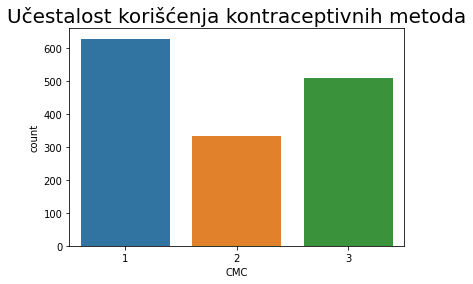

In [ ]:
ax = sns.countplot(y,label="Count")
ax.set_title('Učestalost korišćenja kontraceptivnih metoda', fontsize=20)

Text(0.5, 1.0, 'Korelaciona matrica kontraceptivnih atributa')

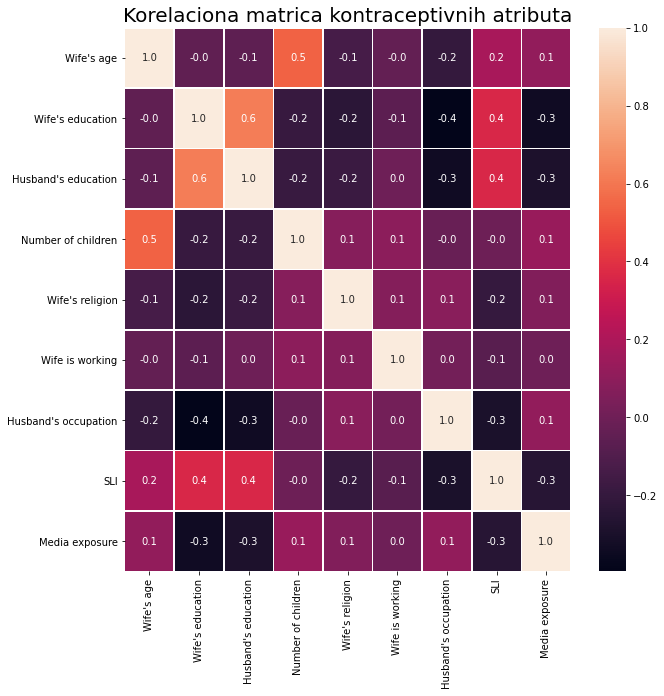

In [ ]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
ax.set_title('Korelaciona matrica kontraceptivnih atributa', fontsize=20)

Text(0.5, 1.0, 'Zavisnost godina žene od izbora kontraceptivne metode')

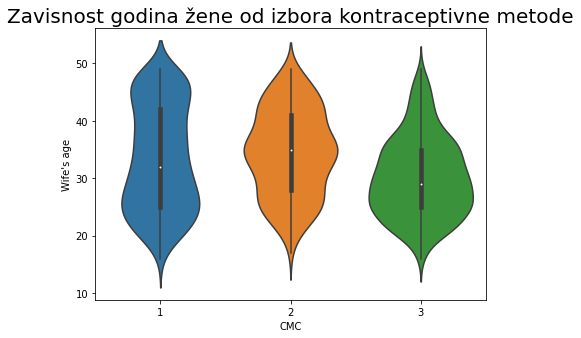

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.violinplot(x="CMC", y="Wife's age", data=data)
ax.set_title('Zavisnost godina žene od izbora kontraceptivne metode', fontsize=20)

Text(0.5, 1.0, 'Zavisnost obrazovanja žene od izbora kontraceptivne metode')

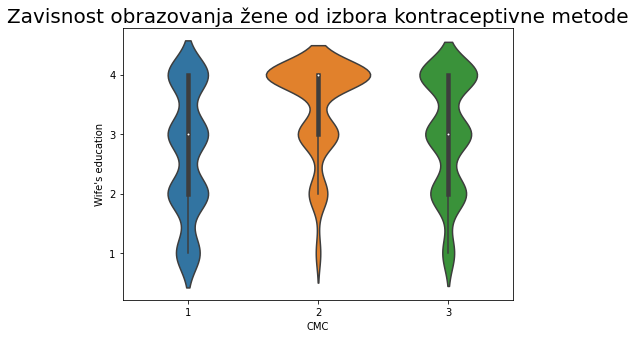

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.violinplot(x="CMC", y="Wife's education", data=data)
ax.set_title('Zavisnost obrazovanja žene od izbora kontraceptivne metode', fontsize=20)


Text(0.5, 1.0, 'Zavisnost broja dece od izbora kontraceptivne metode')

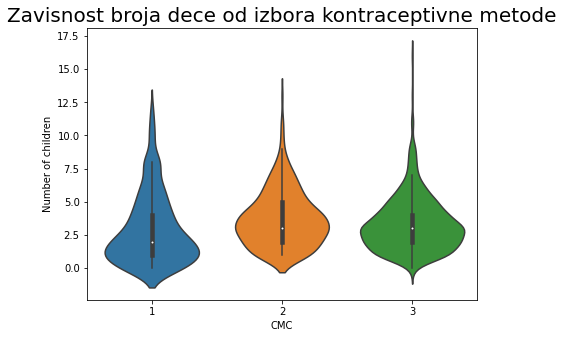

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.violinplot(x="CMC", y="Number of children", data=data)
ax.set_title('Zavisnost broja dece od izbora kontraceptivne metode', fontsize=20)

Text(0.5, 1.0, 'Zavisnost izloženosti medijima od izbora kontraceptivne metode')

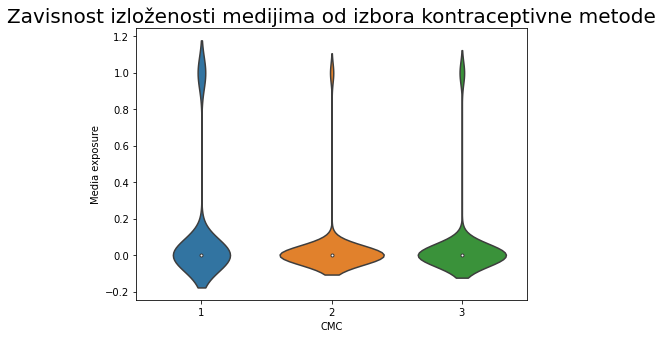

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.violinplot(x="CMC", y="Media exposure", data=data)
ax.set_title('Zavisnost izloženosti medijima od izbora kontraceptivne metode', fontsize=20)

Text(0.5, 1.0, 'Zavisnost životnog standarda od izbora kontraceptivne metode')

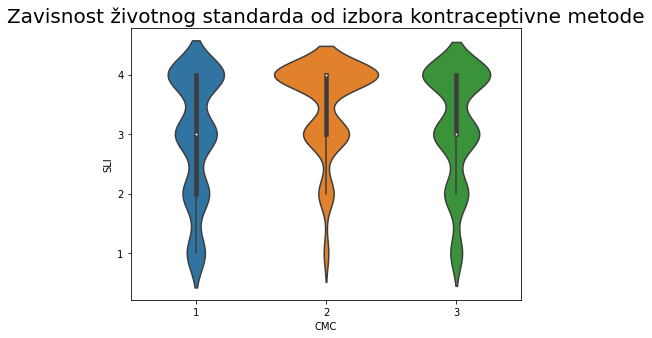

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
sns.violinplot(x="CMC", y="SLI", data=data)
ax.set_title('Zavisnost životnog standarda od izbora kontraceptivne metode', fontsize=20)

Text(0.5, 1.0, 'Broj žena po godinama')

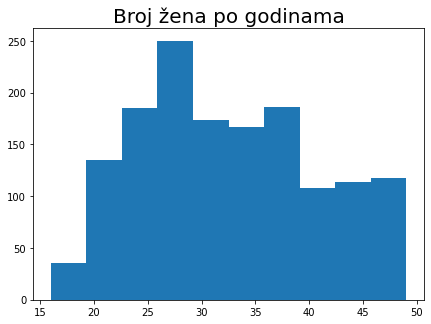

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))
plt.hist(data["Wife's age"])
ax.set_title('Broj žena po godinama', fontsize=20)

In [ ]:
X1 = X
y1 = y

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# nalaženje 5 atributa sa najboljim rezultatom
select_feature = SelectKBest(chi2, k=5).fit(X1, y1) 

In [ ]:
print('Lista rezultata:', select_feature.scores_)
print('Lista atributa:', X1.columns)

Lista rezultata: [132.68028116  45.64613752   9.48391126  45.12805438   3.22934311
   1.29943087  18.13612755  18.39981677  29.23597734]
Lista atributa: Index(['Wife's age', 'Wife's education', 'Husband's education',
       'Number of children', 'Wife's religion', 'Wife is working',
       'Husband's occupation', 'SLI', 'Media exposure'],
      dtype='object')


In [ ]:
X_chi = select_feature.transform(X)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_chi = sc.fit_transform(X_chi)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_chi, y1, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 2)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=2, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)

Accuracy is %: 55.65610859728507


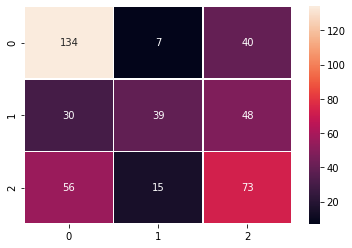

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print("Preciznost je:", ac2*100, "%")

cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm,annot=True,linewidth=.5,fmt="d")

In [ ]:
X2 = X
y2 = y

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X2 = pca.fit_transform(X2)
explained_variance = pca.explained_variance_ratio_

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_pca = sc.fit_transform(X2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y2, test_size = 0.25, random_state = 2)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 2)
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=2, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred2 = classifier.predict(X_test)

Preciznost je: 58.265582655826556 %


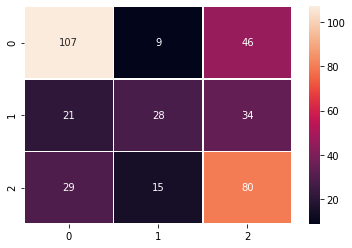

In [ ]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
ac2 = accuracy_score(y_test,y_pred2)
print("Preciznost je:", ac2*100, "%")

cm2 = confusion_matrix(y_test,y_pred2)
ax = sns.heatmap(cm2,annot=True,linewidth=.5,fmt="d")